In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Current Food
current_food = pd.read_csv('current food.csv')
current_food.head(5)

,item,cost,calories per serving,servings left,week,cost per serving
0,Butter,4.0,100,30,1,0.125
1,Rice,6.0,160,46,1,0.120
2,Condiments,10.0,1,1,1,10.000
3,Condiments,10.0,90,8,2,0.100
4,Caprisun,8.0,100,3,3,0.400


In [3]:
# Ate Out
ate_out = pd.read_csv('ate out.csv')
ate_out.head(5)

,item,cost,week
0,boba,10.0,1
1,Sandwiches,0.1,1
2,strip steak,8.0,1
3,pizza,5.0,1
4,Paffles,10.0,1


### Budgeting

Week 1: $11.11 left
Week 2: $-31.24 left
Week 3: $-5.52 left
Week 4: $33.61 left
Week 5: $2.58 left
Week 6: $32.09 left
Week 7: $57.3 left


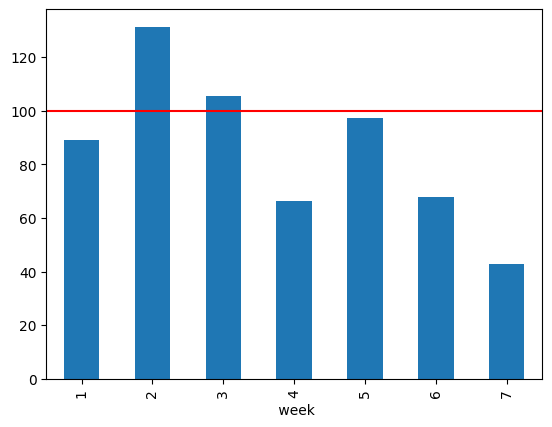

In [4]:
# Concat Current Food and Ate Out
food = pd.concat([current_food, ate_out], ignore_index=True, axis = 0)

# Plot Food Spent Per Week
food.groupby(' week')[' cost'].sum().plot(kind='bar')
weekly = food.groupby(' week')[' cost'].sum()

# Print Amount Under Budget
budget = 100
for i in range(1, len(weekly)+1):
    result = round(budget - weekly[i], 2)
    print("Week " + str(i) + ": $" + str(result) + " left")

# horizontal line
plt.axhline(y=100, color='r', linestyle='-')

In [5]:
# Sum of Food Spent
food[' cost'].sum().round(0)

600.0

### Calories

In [6]:
food['calories'] = food[' calories per serving'] * food[' servings left']
food.groupby(' week')['calories'].sum()


 week
1    10361.0
2      720.0
3      550.0
4     1400.0
5        0.0
6     3850.0
7     7970.0
Name: calories, dtype: float64

In [17]:

print(food[food[' week'] == 5][' cost'].sum())
food[food[' week'] == 5].sort_values(by=' cost', ascending=False)


97.42


,item,cost,calories per serving,servings left,week,cost per serving,calories
116,Marco & Lucas,30.00,NaN,NaN,5,NaN,NaN
89,Pho,13.00,NaN,NaN,5,NaN,NaN
74,Garlic Sub,10.00,NaN,NaN,5,NaN,NaN
90,Bahn Mi,10.00,NaN,NaN,5,NaN,NaN
80,Poke,9.00,NaN,NaN,5,NaN,NaN
100,Egg Burrito,6.00,NaN,NaN,5,NaN,NaN
78,Strawberry,5.00,NaN,NaN,5,NaN,NaN
85,KFT,5.00,NaN,NaN,5,NaN,NaN
92,Strawberry,5.00,NaN,NaN,5,NaN,NaN
91,Strawberry,4.00,NaN,NaN,5,NaN,NaN


In [8]:
food.dropna(axis=0).sort_values(by = ' week', ascending=True)

,item,cost,calories per serving,servings left,week,cost per serving,calories
0,Butter,4.00,100.0,30.0,1,0.125000,3000.0
1,Rice,6.00,160.0,46.0,1,0.120000,7360.0
2,Condiments,10.00,1.0,1.0,1,10.000000,1.0
3,Condiments,10.00,90.0,8.0,2,0.100000,720.0
4,Caprisun,8.00,100.0,3.0,3,0.400000,300.0
5,Rice Paper,4.00,50.0,5.0,3,0.200000,250.0
6,Potatoes,5.99,160.0,5.0,4,0.544545,800.0
7,Eggs,2.00,100.0,6.0,4,0.166667,600.0
8,Beef Ramen,5.00,340.0,10.0,6,0.416667,3400.0
9,Nori,5.00,50.0,9.0,6,0.500000,450.0


day,0,1,2,3,4,5,6
week,,,,,,,
-1,3130.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2900.0,1960.0,2070.0,2330.0,2600.0,1800.0
2,2130.0,2000.0,2580.0,2800.0,3031.0,2100.0,2470.0
3,2390.0,2590.0,2800.0,2140.0,2220.0,1820.0,2000.0
4,1890.0,1960.0,2090.0,1890.0,2150.0,1720.0,2200.0


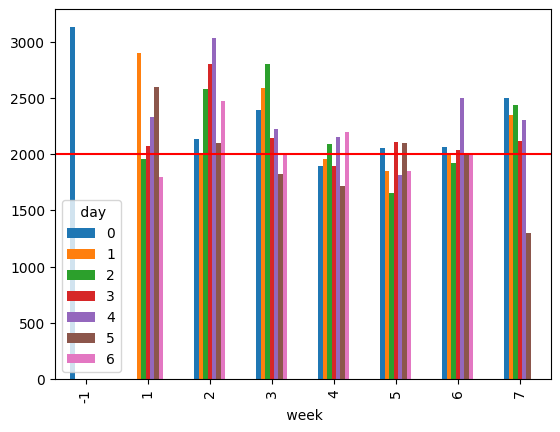

In [9]:
consumption = pd.read_csv('consumption.csv')
consumption.head(5)

import numpy as np
# pivot table of week and day
pivot = pd.pivot_table(consumption, values=' calories', index=[' week'],
                    columns=[' day'], aggfunc=np.sum)

# Plot Bar
pivot.plot(kind='bar')

#horizontal line at 2000
plt.axhline(y=2000, color='r', linestyle='-')

pivot.head(5)

### Master Plot

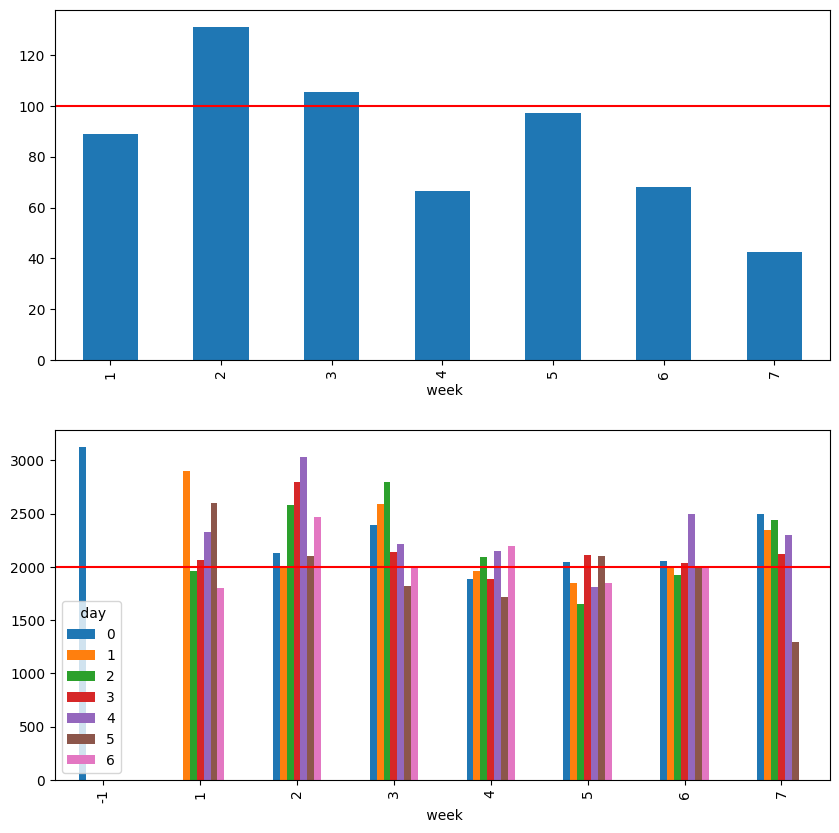

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot Food Spent Per Week
food.groupby(' week')[' cost'].sum().plot(kind='bar', ax=ax[0])
ax[0].axhline(y=100, color='r', linestyle='-')

# Plot Calories Per Week
pivot.plot(kind='bar', ax=ax[1])
ax[1].axhline(y=2000, color='r', linestyle='-')